In [ ]:
!pip install --upgrade tensorflow

import tensorflow as tf
print(tf.__version__)

2.13.0


#importing the libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Input
from tensorflow.keras.models import Model

In [ ]:
#importing mnist_data

mnist_data = tf.keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) = mnist_data.load_data()


4422102/4422102 [==============================] - 0s 0us/step


#standardizing the data


In [ ]:
train_images, test_images = train_images/255, test_images/255
print(train_images.shape)

(60000, 28, 28)


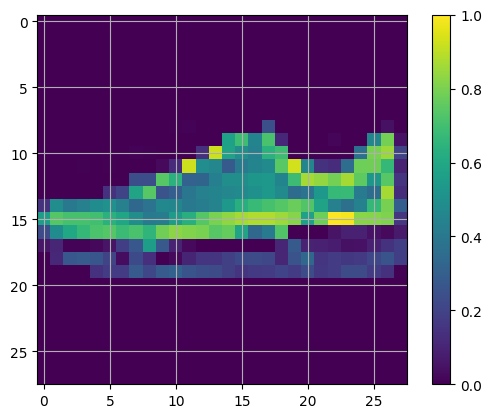

In [ ]:
#plotting sample test_image

plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid()
plt.show()

#reshaping the images

In [ ]:
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

print(train_images.shape)

(60000, 28, 28, 1)


#printing number of output classes

In [ ]:
output_classes = len(set(test_labels))
print(output_classes)

10


#printing the shape of one image

In [ ]:
train_images[0].shape

(28, 28, 1)

#developing a cnn model

In [ ]:

input_layer = Input(shape = train_images[0].shape)
conv1 = Conv2D(32, (3,3), strides = 2, activation = "relu")(input_layer)
maxpool1 = MaxPool2D(2,2)(conv1)
conv2 = Conv2D(64, (3,3), strides = 2, activation = 'relu')(maxpool1)
flat1 = Flatten()(conv2)
drop1 = Dropout(0.2)(flat1)
dense1 = Dense(512, activation = 'relu')(drop1)
drop2 = Dropout(0.2)(dense1)
output_layer = Dense(output_classes, activation ='softmax')(drop2)

model = Model(input_layer, output_layer)

#compiling thecnn model

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

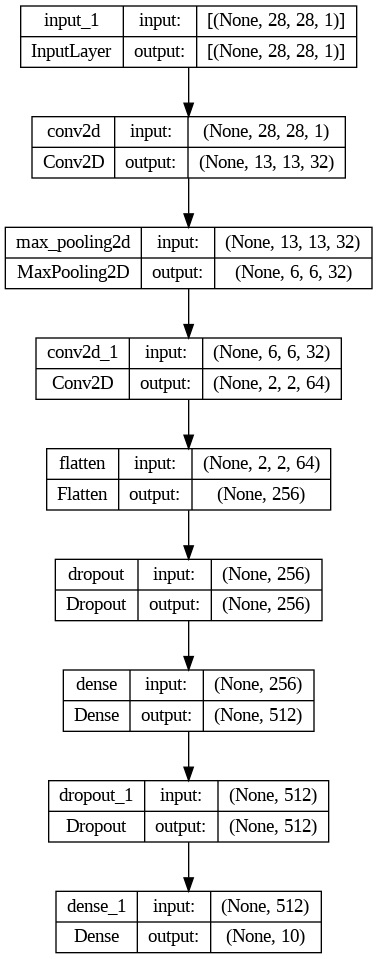

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file = 'plot_model.png', show_shapes = True, show_layer_names = True)

#training the model

In [ ]:
model_history = model.fit(train_images, train_labels, epochs = 20, validation_data = (test_images, test_labels),
                          verbose = 1)

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 0.5968 - accuracy: 0.7831 - val_loss: 0.4457 - val_accuracy: 0.8368
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4319 - accuracy: 0.8395 - val_loss: 0.4074 - val_accuracy: 0.8484
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3894 - accuracy: 0.8549 - val_loss: 0.3806 - val_accuracy: 0.8607
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3631 - accuracy: 0.8642 - val_loss: 0.3751 - val_accuracy: 0.8612
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3431 - accuracy: 0.8716 - val_loss: 0.3532 - val_accuracy: 0.8705
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3279 - accuracy: 0.8767 - val_loss: 0.3402 - val_accuracy: 0.8753
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3131 - accuracy: 0.8837 - val_loss: 0.3493 - val_ac

#plotting the accuracy

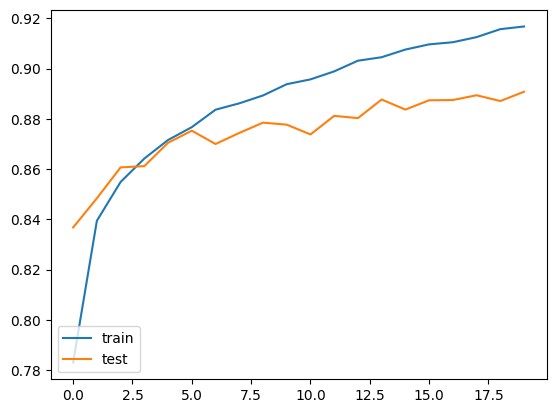

In [ ]:
plt.plot(model_history.history['accuracy'], label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(['train', 'test'], loc = 'lower left')
plt.show()

#making prediction of a single image

In [ ]:
output = model.predict(test_images)
prediction = np.argmax(output[9])
print(prediction)

313/313 [==============================] - 1s 2ms/step
7
